<a href="https://colab.research.google.com/github/mizscrystal/Loan-Default-dataset/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading of necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=35

In [ ]:
# Importing and Reading our data from csv file 
from google.colab import files
dataset = files.upload()
# Reading the dataset from Colab Local Repository
dataset = pd.read_csv("CarLoanDefaulters.csv")

Saving CarLoanDefaulters.csv to CarLoanDefaulters.csv


Data exploration

In [ ]:
#data description
print(dataset.shape)
dataset.head()

(233154, 41)


,Individual_ID,Paid_out_amount,Asset_Cost,Loan_to_Asset_Value,Branch_ID,Provider_ID,Producer_ID,Present_Code_ID,Date_of_Birth,Type_of_Employment,Paying _out_Date,State_of_Residence_ID,Staff_code_ID,TelephoneNo_Flag,Address_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_Score,Bureau_Score_Description,Number_of_loan_taken,Number_of_active_loan,Number_of _overdue_loan,Outstanding_loan_balance,Sanctioned_amount,Total_amount_disbursed,Number_of_loan_taken_indirectly,Number_of_indirect_active_loan,Number_of _overdue_indirect_loan,Indirect_loan_outstanding_balance,Sanctioned_amount_on_indirect,Total_amount_disbursed_on_indirect_loan,Installment_on_direct_loan,Installment_on_indirect_loan,New_loan_taken_in_last_six_months,Defaulted_loan_in_last_six_months,Average_loan_period,Credit_history,Number_of_loan_enquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,3/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,1/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [ ]:
# To get an idea about all the features available in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Individual_ID                            233154 non-null  int64  
 1   Paid_out_amount                          233154 non-null  int64  
 2   Asset_Cost                               233154 non-null  int64  
 3   Loan_to_Asset_Value                      233154 non-null  float64
 4   Branch_ID                                233154 non-null  int64  
 5   Provider_ID                              233154 non-null  int64  
 6   Producer_ID                              233154 non-null  int64  
 7   Present_Code_ID                          233154 non-null  int64  
 8   Date_of_Birth                            233154 non-null  object 
 9   Type_of_Employment                       225493 non-null  object 
 10  Paying _out_Date                

In [ ]:
# Inspect the mean and standard deviation using the describe feature
dataset.describe()

,Individual_ID,Paid_out_amount,Asset_Cost,Loan_to_Asset_Value,Branch_ID,Provider_ID,Producer_ID,Present_Code_ID,State_of_Residence_ID,Staff_code_ID,TelephoneNo_Flag,Address_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_Score,Number_of_loan_taken,Number_of_active_loan,Number_of _overdue_loan,Outstanding_loan_balance,Sanctioned_amount,Total_amount_disbursed,Number_of_loan_taken_indirectly,Number_of_indirect_active_loan,Number_of _overdue_indirect_loan,Indirect_loan_outstanding_balance,Sanctioned_amount_on_indirect,Total_amount_disbursed_on_indirect_loan,Installment_on_direct_loan,Installment_on_indirect_loan,New_loan_taken_in_last_six_months,Defaulted_loan_in_last_six_months,Number_of_loan_enquiries,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


From our dataset we can see that there are 41 features in our dataset

In [ ]:
# We check for null value
dataset.isnull().sum()

Individual_ID                                 0
Paid_out_amount                               0
Asset_Cost                                    0
Loan_to_Asset_Value                           0
Branch_ID                                     0
Provider_ID                                   0
Producer_ID                                   0
Present_Code_ID                               0
Date_of_Birth                                 0
Type_of_Employment                         7661
Paying _out_Date                              0
State_of_Residence_ID                         0
Staff_code_ID                                 0
TelephoneNo_Flag                              0
Address_flag                                  0
PAN_flag                                      0
VoterID_flag                                  0
Driving_flag                                  0
Passport_flag                                 0
Bureau_Score                                  0
Bureau_Score_Description                

As we can see that, Type_of_Employment has missing values so as part of our data preparation, we will first check the percentage of missing values and decide the best way to handle it.

In [ ]:
#First we examine the feature with missing values which is Type_of_Employment
dataset['Type_of_Employment'].isnull().sum()

7661

In [ ]:
# Calculate missing percent value from whole dataset
total_null = dataset.isnull().sum()
percent_null = (total_null/(dataset.isnull().count())) * 100
missing_data = pd.concat([total_null,percent_null], keys=['Total','Percent'],axis=1)
print(missing_data)


                                         Total   Percent
Individual_ID                                0  0.000000
Paid_out_amount                              0  0.000000
Asset_Cost                                   0  0.000000
Loan_to_Asset_Value                          0  0.000000
Branch_ID                                    0  0.000000
Provider_ID                                  0  0.000000
Producer_ID                                  0  0.000000
Present_Code_ID                              0  0.000000
Date_of_Birth                                0  0.000000
Type_of_Employment                        7661  3.285811
Paying _out_Date                             0  0.000000
State_of_Residence_ID                        0  0.000000
Staff_code_ID                                0  0.000000
TelephoneNo_Flag                             0  0.000000
Address_flag                                 0  0.000000
PAN_flag                                     0  0.000000
VoterID_flag                   

Missing values contains only 3.9% of the data, hence we can drop it.

In [ ]:
dataset.dropna(inplace=True)
total_null_1 = dataset.isnull().sum()
percent_null_1 = (total_null_1/(dataset.isnull().count())) * 100
missing_data_1 = pd.concat([total_null_1,percent_null_1], keys=['Total','Percent'],axis=1)
print(missing_data_1)


                                         Total  Percent
Individual_ID                                0      0.0
Paid_out_amount                              0      0.0
Asset_Cost                                   0      0.0
Loan_to_Asset_Value                          0      0.0
Branch_ID                                    0      0.0
Provider_ID                                  0      0.0
Producer_ID                                  0      0.0
Present_Code_ID                              0      0.0
Date_of_Birth                                0      0.0
Type_of_Employment                           0      0.0
Paying _out_Date                             0      0.0
State_of_Residence_ID                        0      0.0
Staff_code_ID                                0      0.0
TelephoneNo_Flag                             0      0.0
Address_flag                                 0      0.0
PAN_flag                                     0      0.0
VoterID_flag                                 0  

Feature selection

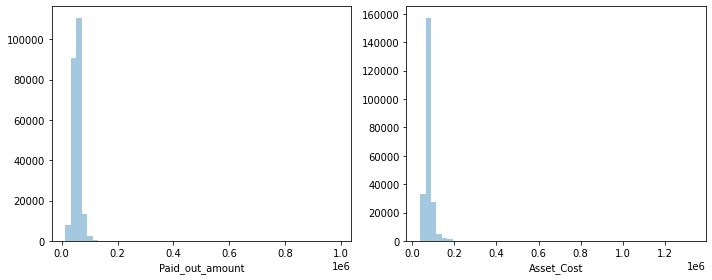

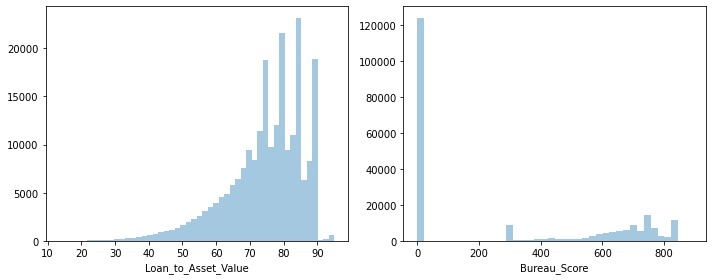

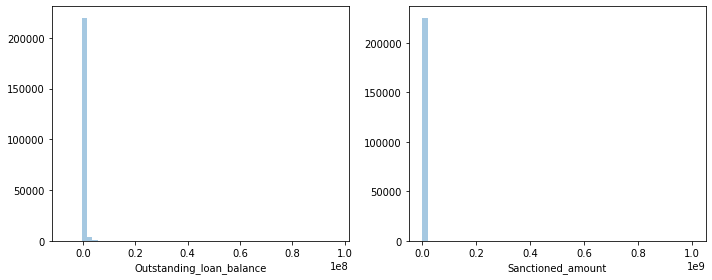

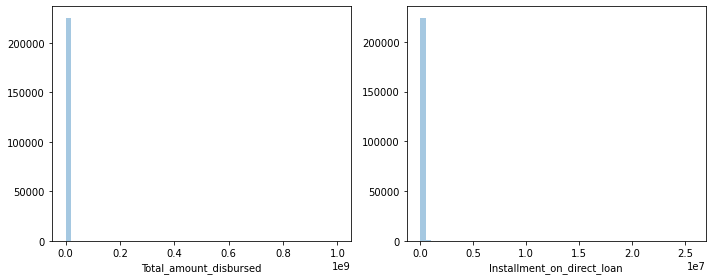

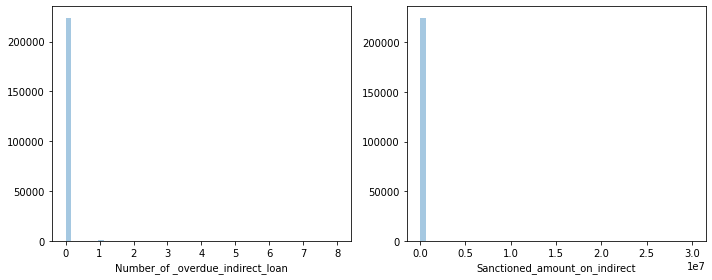

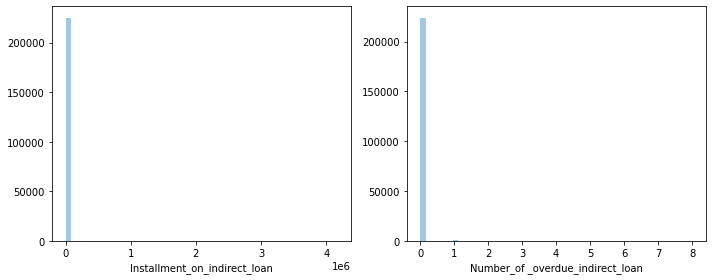

In [ ]:
#We plot histogram to show the distribution of our features.
num_columns = ['Paid_out_amount','Asset_Cost','Loan_to_Asset_Value','Bureau_Score','Outstanding_loan_balance','Sanctioned_amount',
            'Total_amount_disbursed','Installment_on_direct_loan','Number_of _overdue_indirect_loan','Sanctioned_amount_on_indirect','Installment_on_indirect_loan',
            'Number_of _overdue_indirect_loan']

for i in range(0, len(num_columns), 2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(dataset[num_columns[i]], kde=False)
    plt.subplot(122)            
    sns.distplot(dataset[num_columns[i+1]], kde=False)
    plt.tight_layout()
    plt.show()

In [ ]:
#Seperating numerical and categorical features
# List of columns with numerical features
numerical_feature_columns = list(dataset._get_numeric_data().columns)
numerical_feature_columns

['Individual_ID',
 'Paid_out_amount',
 'Asset_Cost',
 'Loan_to_Asset_Value',
 'Branch_ID',
 'Provider_ID',
 'Producer_ID',
 'Present_Code_ID',
 'State_of_Residence_ID',
 'Staff_code_ID',
 'TelephoneNo_Flag',
 'Address_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'Bureau_Score',
 'Number_of_loan_taken',
 'Number_of_active_loan',
 'Number_of _overdue_loan',
 'Outstanding_loan_balance',
 'Sanctioned_amount',
 'Total_amount_disbursed',
 'Number_of_loan_taken_indirectly',
 'Number_of_indirect_active_loan',
 'Number_of _overdue_indirect_loan',
 'Indirect_loan_outstanding_balance',
 'Sanctioned_amount_on_indirect',
 'Total_amount_disbursed_on_indirect_loan',
 'Installment_on_direct_loan',
 'Installment_on_indirect_loan',
 'New_loan_taken_in_last_six_months',
 'Defaulted_loan_in_last_six_months',
 'Number_of_loan_enquiries',
 'loan_default']

In [ ]:
# List of columns with categorical features
categorical_feature_columns = list(set(dataset.columns) - set(numerical_feature_columns))
categorical_feature_columns

['Credit_history',
 'Date_of_Birth',
 'Paying _out_Date',
 'Type_of_Employment',
 'Average_loan_period',
 'Bureau_Score_Description']

In [ ]:
#Check categorical data
dataset[categorical_feature_columns].head()

,Credit_history,Date_of_Birth,Paying _out_Date,Type_of_Employment,Average_loan_period,Bureau_Score_Description
0,0yrs 0mon,1/1/1984,3/8/2018,Salaried,0yrs 0mon,No Bureau History Available
1,1yrs 11mon,31-07-85,26-09-18,Self employed,1yrs 11mon,I-Medium Risk
2,0yrs 0mon,24-08-85,1/8/2018,Self employed,0yrs 0mon,No Bureau History Available
3,1yrs 3mon,30-12-93,26-10-18,Self employed,0yrs 8mon,L-Very High Risk
4,0yrs 0mon,9/12/1977,26-09-18,Self employed,0yrs 0mon,No Bureau History Available


In [ ]:
#Two features Average_loan_period and Average_loan_period need to convert in terms of years.
dataset['Average_loan_period'] = dataset['Average_loan_period'].str.replace('yrs ','.',regex=False)
dataset['Average_loan_period'] = dataset['Average_loan_period'].str.replace('mon','',regex=False).astype(float)
dataset['Credit_history'] = dataset['Credit_history'].str.replace('yrs ','.',regex=False)
dataset['Credit_history'] = dataset['Credit_history'].str.replace('mon','',regex=False).astype(float)
dataset[categorical_feature_columns].head()

,Credit_history,Date_of_Birth,Paying _out_Date,Type_of_Employment,Average_loan_period,Bureau_Score_Description
0,0.00,1/1/1984,3/8/2018,Salaried,0.00,No Bureau History Available
1,1.11,31-07-85,26-09-18,Self employed,1.11,I-Medium Risk
2,0.00,24-08-85,1/8/2018,Self employed,0.00,No Bureau History Available
3,1.30,30-12-93,26-10-18,Self employed,0.80,L-Very High Risk
4,0.00,9/12/1977,26-09-18,Self employed,0.00,No Bureau History Available


In [ ]:
# Count the each category values from feature
dataset['Type_of_Employment'].value_counts()

Self employed    127635
Salaried          97858
Name: Type_of_Employment, dtype: int64

In [ ]:
# Encode the values in terms of 0 and 1
dataset['Type_of_Employment'].replace({'Salaried': 0, 'Self employed': 1}, inplace=True)

In [ ]:
# Dropping unecessary features
dataset.drop(['Date_of_Birth','Bureau_Score_Description', 'Provider_ID', 'Paying _out_Date'], axis = 1, inplace=True)
dataset.shape

(225493, 37)

Distribution of the loan_default in the dataset
0    0.782845
1    0.217155
Name: loan_default, dtype: float64


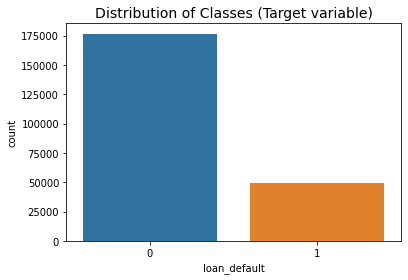

In [ ]:
#Plotting distribution of classes of target variable:
print('Distribution of the loan_default in the dataset')
print(dataset['loan_default'].value_counts()/len(dataset))

sns.countplot('loan_default', data=dataset)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

In [ ]:
#Here we clearly see the imbalance between two classes. We need to resolve class imbalance by oversampling class 1.
# Over sampling to resolve imbalance
dataset = dataset.sample(frac=1)
loan_default_1 = dataset.loc[dataset['loan_default'] == 1]
loan_default_0 = dataset.loc[dataset['loan_default'] == 0]

normal_distributed_df = pd.concat([loan_default_1, loan_default_1, loan_default_1, loan_default_0])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()



,Individual_ID,Paid_out_amount,Asset_Cost,Loan_to_Asset_Value,Branch_ID,Producer_ID,Present_Code_ID,Type_of_Employment,State_of_Residence_ID,Staff_code_ID,TelephoneNo_Flag,Address_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_Score,Number_of_loan_taken,Number_of_active_loan,Number_of _overdue_loan,Outstanding_loan_balance,Sanctioned_amount,Total_amount_disbursed,Number_of_loan_taken_indirectly,Number_of_indirect_active_loan,Number_of _overdue_indirect_loan,Indirect_loan_outstanding_balance,Sanctioned_amount_on_indirect,Total_amount_disbursed_on_indirect_loan,Installment_on_direct_loan,Installment_on_indirect_loan,New_loan_taken_in_last_six_months,Defaulted_loan_in_last_six_months,Average_loan_period,Credit_history,Number_of_loan_enquiries,loan_default
151265,583639,46349,61181,78.46,3,86,49,1,1,1980,1,1,0,0,0,0,738,1,1,0,2664,8000,8000,0,0,0,0,0,0,1334,0,1,0,0.3,0.3,0,0
36627,496028,49303,74501,68.46,65,45,6814,0,13,771,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
115789,611089,66882,78360,88.06,1,45,6102,1,3,851,1,0,0,1,0,0,631,1,1,0,15806,15000,15000,0,0,0,0,0,0,0,0,0,0,3.3,3.3,0,1
231172,594504,56713,69783,83.40,74,86,2610,0,4,176,1,1,0,0,0,0,681,3,2,0,15500,21926,21926,0,0,0,0,0,0,3606,0,2,0,0.3,0.6,1,1
144718,601472,44745,62320,74.78,10,48,5732,1,3,1831,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0


Distribution of the loan_default in the dataset
0    0.545799
1    0.454201
Name: loan_default, dtype: float64


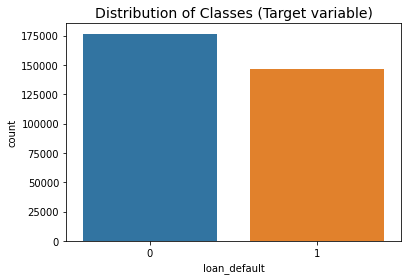

In [ ]:
print('Distribution of the loan_default in the dataset')
print(new_df['loan_default'].value_counts()/len(new_df))

sns.countplot('loan_default', data=new_df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

Features seperation

In [ ]:
X = new_df.drop('loan_default', axis=1)
y = new_df['loan_default'].copy()

In [ ]:
#Split train and test data with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)

Build and evaluate models

Define evaluation function which calculates following metrics:

    Confusion matrix
    Accuracy score
    Precision
    Recall
    F1 score
    ROC AUC score.



In [ ]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("Precision: ",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))
    print("f1 score: ",metrics.f1_score(y_test, y_pred))
    print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))

In [ ]:
#Scaling data before model training and testing
# Scaling training and testing data
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
# Find best parameters using grid search
params = {'C':[0.1, 0.5, 1, 5]}

lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[38291 14681]
 [24434 19623]]
Accuracy:  0.5968730997949067
Precision:  0.5720324160447762
Recall:  0.44540027691399775
f1 score:  0.5008358749888339
roc_auc_score:  0.5841269299694961


In [ ]:
params = {'criterion':['gini','entropy'], 'max_depth': [2,3,4,5]}
dt = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, params)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[36533 16439]
 [23474 20583]]
Accuracy:  0.5886487544960785
Precision:  0.5559667224893307
Recall:  0.46719023083732436
f1 score:  0.5077270316604793
roc_auc_score:  0.5784282348024876


In [ ]:
rf = RandomForestClassifier(n_estimators=250, random_state=random_state)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[47506  5466]
 [ 3057 41000]]
Accuracy:  0.9121602819775531
Precision:  0.8823656006542419
Recall:  0.9306126154754069
f1 score:  0.9058471327728865
roc_auc_score:  0.9137130131669868
